# Introdução

## Importação das bibliotecas necessarias

In [250]:
%matplotlib inline
import requests
import pandas as pd
import os
import json
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import random as random
import numpy as np
import ipywidgets as widgets
import glob, os
from itertools import cycle
sns.set()

## Pegar o CSV do Indicador, Estados e Municípios

Aqui é utilizado o indicador "Proporção de nascidos vivos de mulheres com idade inferior a 20 anos (gestação na adolescência)"

In [251]:
csvs = glob.glob(os.path.join('./csv_files/*.csv'))
df_csvs = pd.DataFrame(csvs,columns=['Indicadores'])

In [252]:
indicadores = df_csvs['Indicadores'].map(lambda x: x.lstrip('./csv_files/').rstrip('.csv'))
df_indicadores = pd.DataFrame(indicadores,columns=['Indicadores'])

In [253]:
ano_esc = int( input("Diga ano que deseja visualizar: \n") )

Diga ano que deseja visualizar: 
 2016


In [254]:
indicador_select = widgets.Dropdown(
    options=df_indicadores['Indicadores'].values,
    value='Q-01-proporcao_gravidez_idade_menor_que_20',
    description='Indicadores:',
    disabled=False,
)
display(indicador_select)

Dropdown(description='Indicadores:', index=34, options=('QR-29-taxa_fecundidade_20_34', 'QR-30-taxa_fecundidad…

In [255]:
indicador_select.value
nome_arquivo_indicador = indicador_select.value
arquivo_indicador= df_csvs[df_csvs['Indicadores'].str.contains(indicador_select.value)]['Indicadores'].values[0]
print(arquivo_indicador)

'''
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')
'''

./csv_files/Q-16-proporcao_nascidos_vivos_grupo_11_de_robson_brasil.csv


"\nnome_estado = estados_select.value\nprint(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')\n"

In [256]:
df = pd.read_csv(arquivo_indicador)
df_estados = pd.read_csv('./csv_files/Estados.csv')
df_municipios = pd.read_csv('./csv_files/Municipios.csv')
df

,CODMUNRES,ano_nasc,Qtd_Robson,Qtd_Total,Ratio
0,110000,2012,0.0,2,0.000000
1,110000,2013,0.0,16,0.000000
2,110000,2014,0.0,4,0.000000
3,110000,2015,0.0,4,0.000000
4,110000,2016,1.0,2,0.500000
...,...,...,...,...,...
44678,530010,2015,1891.0,46122,0.041000
44679,530010,2016,1093.0,43340,0.025219
44680,530010,2017,1967.0,44568,0.044135
44681,530010,2018,911.0,44195,0.020613


In [257]:
coluna_codigo = df.columns[0] 
ano =           df.columns[1] 
indicador =     df.columns[2]
total =         df.columns[3]
ratio =         df.columns[4]
print(coluna_codigo,ano,indicador,total,ratio)

CODMUNRES ano_nasc Qtd_Robson Qtd_Total Ratio


## Solução do problema de 2019 vazio

In [258]:
aux_municipios = np.array(df.drop_duplicates(subset=[coluna_codigo])[coluna_codigo])
aux_anos = np.array(df.drop_duplicates(subset=[ano])[ano])
aux_anos = np.sort(aux_anos)
 
seq = cycle(aux_anos)
df_join = pd.DataFrame(columns=[coluna_codigo,ano,indicador,total,ratio])
df_join[ano] = [next(seq) for count in range(len(aux_municipios)*len(aux_anos))]

print(df_join.iloc([coluna_codigo],[0]))

for codigo in aux_municipios:
    for i in range(8):
        df_join.iloc([i],[coluna_codigo])=codigo

df_join

SyntaxError: cannot assign to function call (<ipython-input-258-0dd219bb2c63>, line 13)

In [259]:
print(df[df[ano]==2012].shape)
print(df[df[ano]==2013].shape)
print(df[df[ano]==2014].shape)
print(df[df[ano]==2015].shape)
print(df[df[ano]==2016].shape)
print(df[df[ano]==2017].shape)
print(df[df[ano]==2018].shape)
print(df[df[ano]==2019].shape)

(5584, 5)
(5589, 5)
(5584, 5)
(5588, 5)
(5588, 5)
(5583, 5)
(5584, 5)
(5583, 5)


In [260]:
df_municipios[coluna_codigo] = df_municipios[coluna_codigo].astype(str)
f2d = df_municipios[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_municipios['COD_UF'] = f2d.astype(int)
df_municipios

,res_MUNNOME,CODMUNRES,COD_UF
0,Município ignorado - RO,110000,11
1,Alta Floresta D'Oeste,110001,11
2,Ariquemes,110002,11
3,Cabixi,110003,11
4,Cacoal,110004,11
...,...,...,...
5579,Vianópolis,522200,52
5580,Vicentinópolis,522205,52
5581,Vila Boa,522220,52
5582,Vila Propício,522230,52


In [261]:
estados_select = widgets.Dropdown(
    options=df_estados['res_NOME_UF'].values,
    value='MINAS GERAIS',
    description='Estados:',
    disabled=False,
)
display(estados_select)

Dropdown(description='Estados:', index=16, options=('RONDONIA', 'ACRE', 'AMAZONAS', 'RORAIMA', 'PARA', 'AMAPA'…

In [262]:
nome_estado = estados_select.value
print(int(df.drop_duplicates(subset=[coluna_codigo]).shape[0]),'Municípios registrados no país')

5594 Municípios registrados no país


In [263]:
anos = [2012,2013,2014,2015,2016,2017,2018,2019]
print(anos)

for i in anos:
    aux = df[df[ano]==i]
    aux1 = aux[aux[total]<100]
    print('Ano: ',i,' Municipios com menos de 100 registros no total: ', aux1.shape[0])

[2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
Ano:  2012  Municipios com menos de 100 registros no total:  2130
Ano:  2013  Municipios com menos de 100 registros no total:  2181
Ano:  2014  Municipios com menos de 100 registros no total:  2120
Ano:  2015  Municipios com menos de 100 registros no total:  2137
Ano:  2016  Municipios com menos de 100 registros no total:  2212
Ano:  2017  Municipios com menos de 100 registros no total:  2151
Ano:  2018  Municipios com menos de 100 registros no total:  2134
Ano:  2019  Municipios com menos de 100 registros no total:  2173


In [264]:
uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]
novo_municipios_uf = df_municipios[df_municipios['COD_UF'] == uf_selecionada]

municipios_select = widgets.Dropdown(
    options=municipios_uf['res_MUNNOME'].values,
    value=municipios_uf['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

subset_nao_ignorado = df[df[coluna_codigo]%10000 != 0]

df1 = municipios_uf
df2 = subset_nao_ignorado

df1 = df1.astype({coluna_codigo: int})
result = pd.merge(df2, df1 ,on=[coluna_codigo])

uf_selecionada = df_estados[df_estados['res_NOME_UF']==estados_select.value]['COD_UF'].values[0]
result = result[result['COD_UF'] == uf_selecionada]

droped_duplicates = result.drop_duplicates(subset=['res_MUNNOME'])

municipios_select = widgets.Dropdown(
    options=droped_duplicates['res_MUNNOME'].values,
    value=droped_duplicates['res_MUNNOME'].values[0],
    description='Municipio:',
    disabled=False,
)

display(municipios_select)

Dropdown(description='Municipio:', options=('Angra dos Reis', 'Aperibé', 'Araruama', 'Areal', 'Armação dos Búz…

In [265]:
cod_municipio  = municipios_uf[municipios_uf['res_MUNNOME'] == municipios_select.value][coluna_codigo].values[0]
cod_estado = int(str(cod_municipio)[:2])
nome_municipio = municipios_select.value

cod_municipio

'330455'

In [266]:
subset_mun = subset_nao_ignorado[subset_nao_ignorado[coluna_codigo] == int( cod_municipio )]
subset_mun.head(10)

,CODMUNRES,ano_nasc,Qtd_Robson,Qtd_Total,Ratio
26031,330455,2012,9408.0,86549,0.108701
26032,330455,2013,0.0,87661,0.000000
26033,330455,2014,5547.0,89991,0.061639
26034,330455,2015,2355.0,90694,0.025966
26035,330455,2016,1518.0,83166,0.018253
26036,330455,2017,1286.0,84521,0.015215
26037,330455,2018,1744.0,82554,0.021126
26038,330455,2019,1541.0,76803,0.020064


In [267]:
nome_indicador = nome_arquivo_indicador.replace('-',' ').replace('_',' ').upper()[3:]
print(nome_indicador)

6 PROPORCAO NASCIDOS VIVOS GRUPO 11 DE ROBSON BRASIL


## Gráficos por município

### Plot em Stacked Bar do município escolhido considerando os valores absolutos

Aqui são plotadas as barras de Quantidade do Indicador e Quantidade Fora do Indicador, o que permite visualizar os valores absolutos para cada ano no município escolhido.

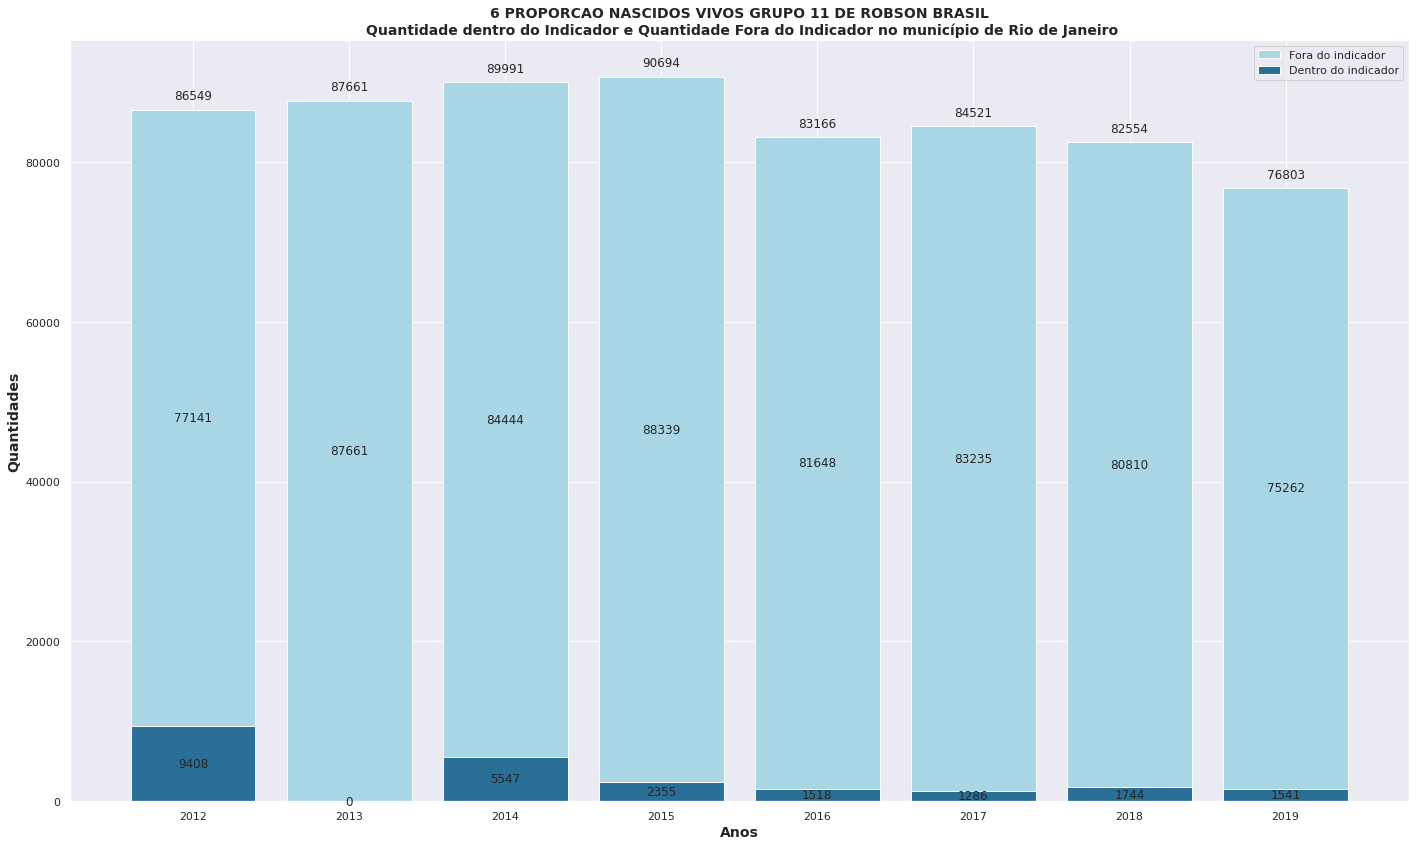

In [268]:
fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( subset_mun[ano], subset_mun[total] - subset_mun[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( subset_mun[ano], subset_mun[indicador], color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

In [269]:
subset_mun.head()

,CODMUNRES,ano_nasc,Qtd_Robson,Qtd_Total,Ratio
26031,330455,2012,9408.0,86549,0.108701
26032,330455,2013,0.0,87661,0.000000
26033,330455,2014,5547.0,89991,0.061639
26034,330455,2015,2355.0,90694,0.025966
26035,330455,2016,1518.0,83166,0.018253


### Plot em Stacked Bar do município escolhido considerando as proporções

Aqui são plotadas as barras de Proporção dentro do Indicador e Proporção Fora do Indicador, o que permite visualizar a proporção para cada ano no município escolhido.

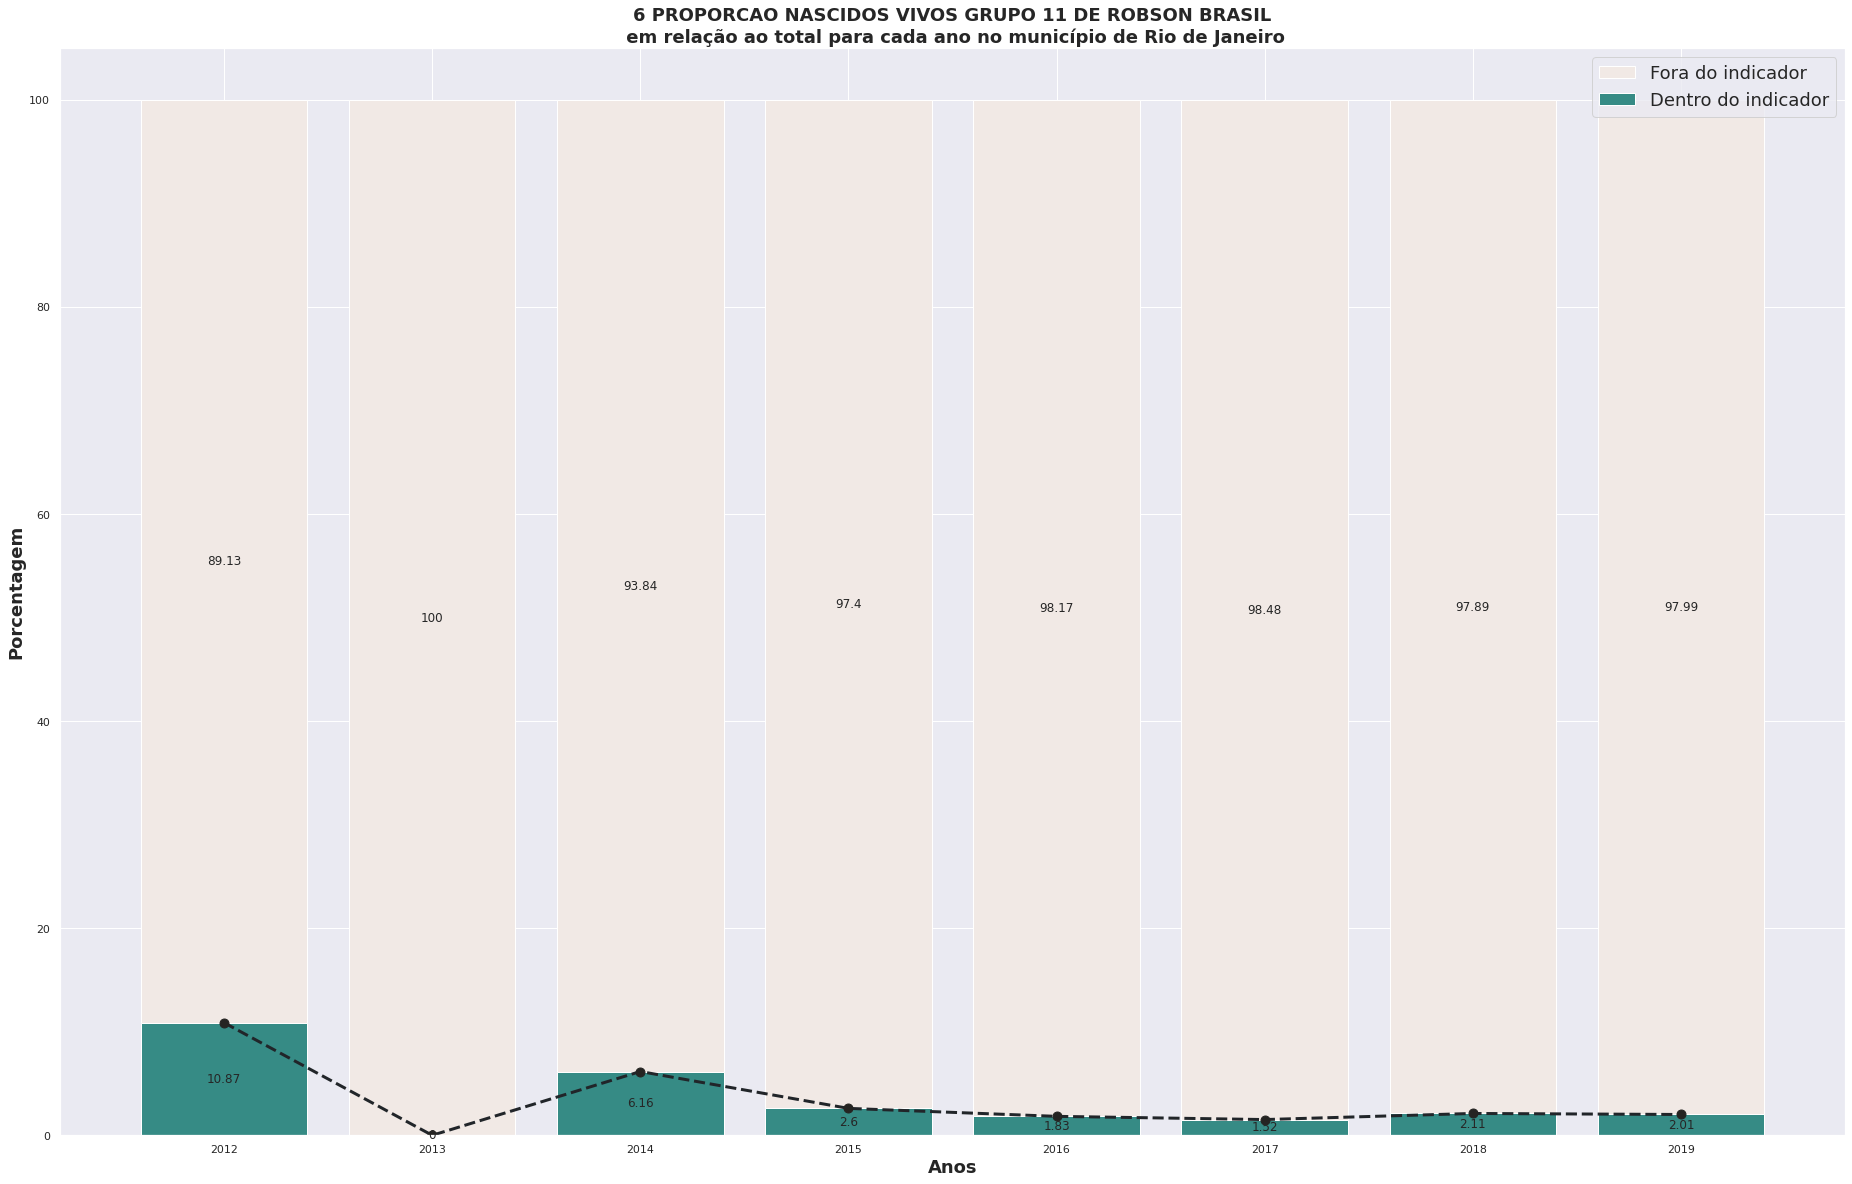

In [270]:
# Falta mostrar dentro desse gráfico a média Estadual, Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(100*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico1', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar do estado que o município escolhido pertence considerando as proporções

Aqui serão calculadas os números acumulados de registros em relação a estado e país para cada ano, para que depois possam ser analisadas as proporções. Essa célula pode ser necessária antes, visto que precisamos mostrar tanto o quartil que o estado se encontra em relação ao país, quanto o quartil que um município em específico de encontra em relação ao estado.

In [271]:
subset_nao_ignorado = subset_nao_ignorado.astype({coluna_codigo: str})
subset_nao_ignorado[ano] =       subset_nao_ignorado[ano].astype(int)
subset_nao_ignorado[indicador] = subset_nao_ignorado[indicador].astype(int)
subset_nao_ignorado[total] =     subset_nao_ignorado[total].astype(int)

f2d = subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False)
df_grouped_by_state = subset_nao_ignorado.groupby([f2d, ano], as_index=True).agg({indicador:'sum', total:'sum'})
df_grouped_by_state.reset_index(inplace=True)
df_grouped_by_state.rename(columns = {coluna_codigo:'COD_UF'}, inplace = True)
df_grouped_by_state[ratio] =  df_grouped_by_state[indicador]/df_grouped_by_state[total]
df_grouped_by_state['COD_UF'] = df_grouped_by_state['COD_UF'].astype(int)

numero_municipios_estado = int(droped_duplicates['res_MUNNOME'].shape[0])

df_estado_acumulado = df_grouped_by_state[df_grouped_by_state['COD_UF']==cod_estado]

print(numero_municipios_estado, 'Municípios com mais de 100 registros no estado',nome_estado,'para o indicador',nome_indicador,'\n')
print(df_estado_acumulado)

92 Municípios com mais de 100 registros no estado RIO DE JANEIRO para o indicador 6 PROPORCAO NASCIDOS VIVOS GRUPO 11 DE ROBSON BRASIL 

     COD_UF  ano_nasc  Qtd_Robson  Qtd_Total     Ratio
144      33      2012       19265     222837  0.086453
145      33      2013           0     224008  0.000000
146      33      2014       17707     233569  0.075811
147      33      2015       13437     236946  0.056709
148      33      2016        7022     219124  0.032046
149      33      2017        6662     223216  0.029846
150      33      2018        6423     220481  0.029132
151      33      2019        5168     207966  0.024850


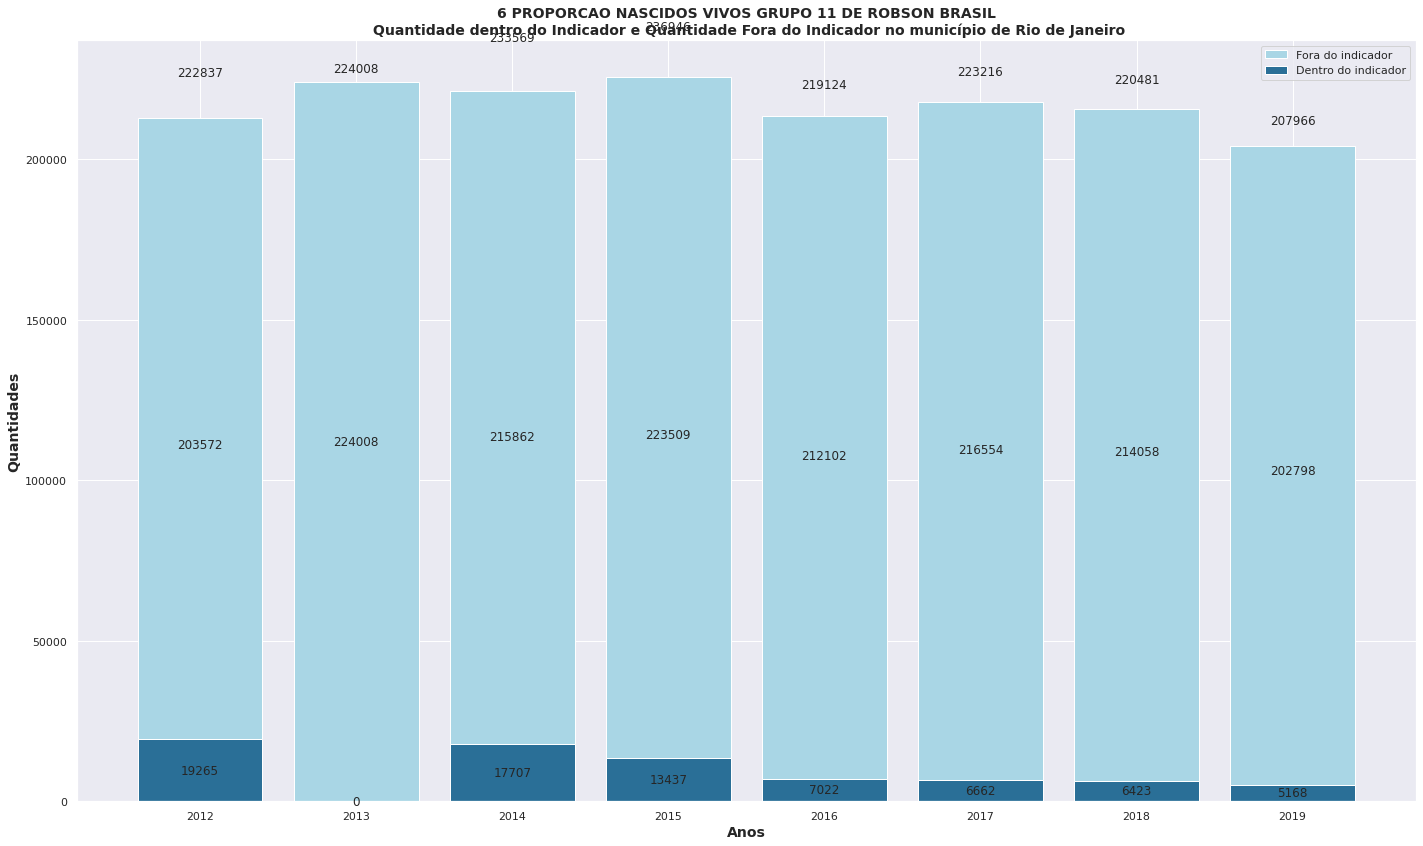

In [272]:
fig, ax = plt.subplots(figsize=(24, 14))

p1=ax.bar( df_estado_acumulado[ano], df_estado_acumulado[total] - df_estado_acumulado[indicador], bottom=subset_mun[indicador], color ='#a9d6e5', label = 'Fora do indicador')
p2=ax.bar( df_estado_acumulado[ano], df_estado_acumulado[indicador], color ='#2a6f97', label = 'Dentro do indicador')

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 14}

plt.title(nome_indicador+ "\n Quantidade dentro do Indicador e Quantidade Fora do Indicador no município de "+nome_municipio,**font)
plt.xlabel('Anos',**font)
plt.ylabel('Quantidades',**font)

for i in range(8):
    height = int(p1[i].get_height() + p2[i].get_height())
    plt.text(p1[i].get_x() + p1[i].get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend()
plt.show()

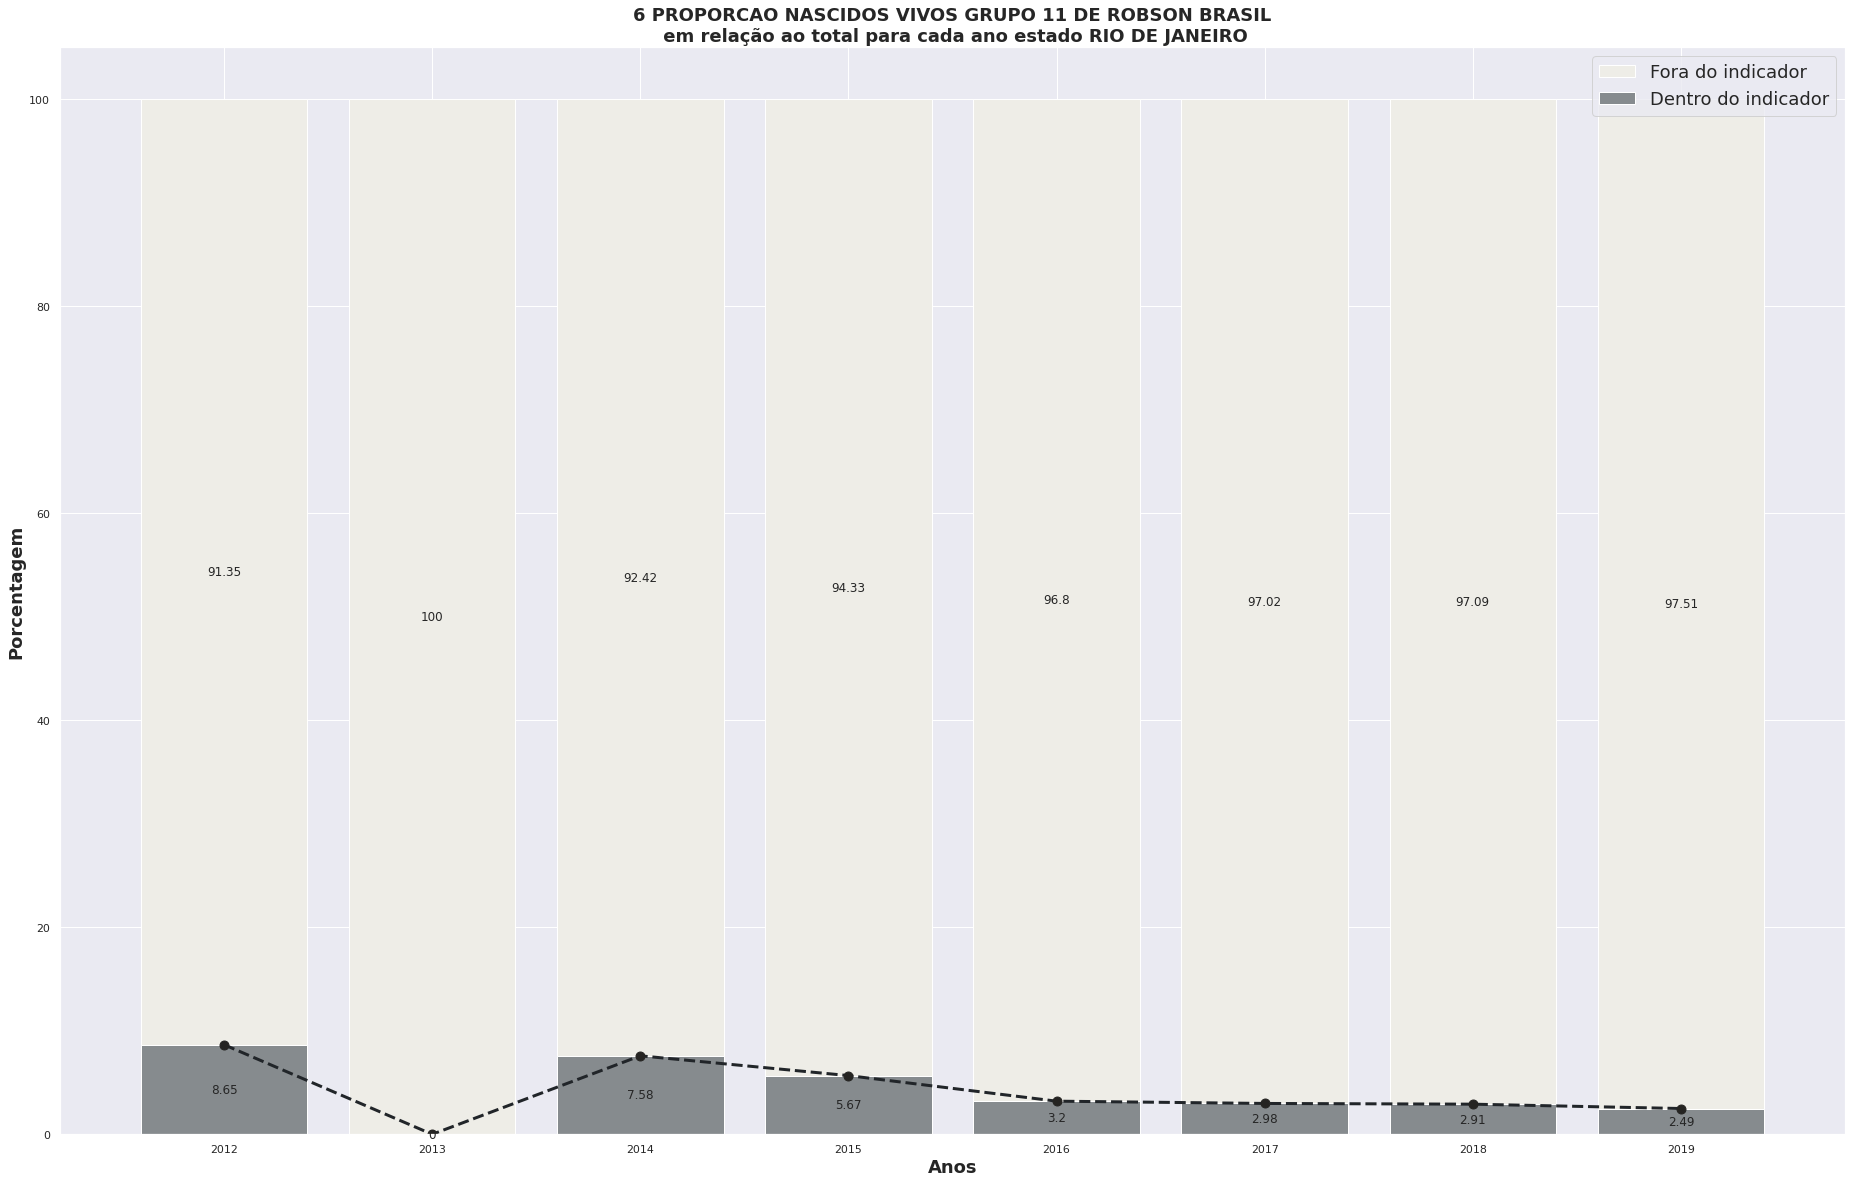

In [273]:
# Falta mostrar dentro desse gráfico a média Regional e Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_estado_acumulado[ano],  np.round(100 - 100*df_estado_acumulado[ratio], decimals=2) , bottom= np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#EEEDE7', label = 'Fora do indicador')
p2 = ax.bar(df_estado_acumulado[ano],  np.round(100*df_estado_acumulado[ratio], decimals=2), color ='#868B8E', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano estado " + nome_estado, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico2', bbox_inches='tight')
plt.show()

### Plot em Stacked Bar da região que o município escolhido pertence considerando as proporções

In [274]:
norte =         subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '1') ]
nordeste =      subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '2') ]
sudeste =       subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '3') ]
sul =           subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '4') ]
centro_oeste =  subset_nao_ignorado.loc[(subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{1})', expand=False) == '5') ]

print(sudeste)
sudeste.to_csv('./csv_files/37-sudeste.csv',index=False)

      CODMUNRES  ano_nasc  Qtd_Robson  Qtd_Total     Ratio
18035    310010      2012           0         68  0.000000
18036    310010      2013           0         57  0.000000
18037    310010      2014           1         71  0.014085
18038    310010      2015           0         53  0.000000
18039    310010      2016           0         59  0.000000
...         ...       ...         ...        ...       ...
31394    355730      2015          13        147  0.088435
31395    355730      2016          17        137  0.124088
31396    355730      2017           8        127  0.062992
31397    355730      2018           0        137  0.000000
31398    355730      2019           1        145  0.006897

[13344 rows x 5 columns]


In [275]:
def acumula(dataframe):
    anos = np.array(dataframe[ano][:8]).astype(int)

    soma_anos_total = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_total[i] = dataframe.loc[dataframe[ano]==anos[i], total ].sum()

    soma_anos_indicador = np.zeros(8).astype(int)
    for i in range(8):
        soma_anos_indicador[i] = dataframe.loc[dataframe[ano]==anos[i], indicador ].sum()

    list_of_tuples = list(zip(anos,soma_anos_indicador, soma_anos_total, np.round(soma_anos_indicador/soma_anos_total,decimals=8)))
    acumulado = pd.DataFrame(list_of_tuples,columns=[ano,indicador,total,ratio])
    
    return acumulado

In [276]:
norte_acumulado = acumula(norte)
#norte_acumulado.insert(loc=0,column='CODREGIAO',value=[1,1,1,1,1,1,1,1])
norte_acumulado.insert(loc=0,column='NOMEREGIAO',value='Norte')

nordeste_acumulado = acumula(nordeste)
#nordeste_acumulado.insert(loc=0,column='CODREGIAO',value=[2,2,2,2,2,2,2,2])
nordeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Nordeste')

sudeste_acumulado = acumula(sudeste)
#sudeste_acumulado.insert(loc=0,column='CODREGIAO',value=[3,3,3,3,3,3,3,3])
sudeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sudeste')


sul_acumulado = acumula(sul)
#sul_acumulado.insert(loc=0,column='CODREGIAO',value=[4,4,4,4,4,4,4,4])
sul_acumulado.insert(loc=0,column='NOMEREGIAO',value='Sul')


centro_oeste_acumulado = acumula(centro_oeste)
#centro_oeste_acumulado.insert(loc=0,column='CODREGIAO',value=[5,5,5,5,5,5,5,5])
centro_oeste_acumulado.insert(loc=0,column='NOMEREGIAO',value='Centro Oeste')


print(sudeste_acumulado)
print('\n',sul_acumulado)
print('\n',centro_oeste_acumulado)
print('\n',nordeste_acumulado)
print('\n',norte_acumulado)

  NOMEREGIAO  ano_nasc  Qtd_Robson  Qtd_Total     Ratio
0    Sudeste      2012       66102    1152791  0.057341
1    Sudeste      2013           0    1147576  0.000000
2    Sudeste      2014       46066    1182913  0.038943
3    Sudeste      2015       42559    1196195  0.035579
4    Sudeste      2016       20222    1127473  0.017936
5    Sudeste      2017       17495    1151817  0.015189
6    Sudeste      2018       15329    1146980  0.013365
7    Sudeste      2019       12377    1102964  0.011222

   NOMEREGIAO  ano_nasc  Qtd_Robson  Qtd_Total     Ratio
0        Sul      2012       20125     381658  0.052730
1        Sul      2013           0     386978  0.000000
2        Sul      2014        9857     396460  0.024863
3        Sul      2015        7011     406526  0.017246
4        Sul      2016        5580     391789  0.014242
5        Sul      2017        4879     397595  0.012271
6        Sul      2018        3916     395857  0.009892
7        Sul      2019        4396     386093 

In [277]:
df_brasil_regiao = norte_acumulado.append(nordeste_acumulado).append(sudeste_acumulado).append(sul_acumulado).append(centro_oeste_acumulado)
df_brasil_regiao

,NOMEREGIAO,ano_nasc,Qtd_Robson,Qtd_Total,Ratio
0,Norte,2012,43896,308353,0.142356
1,Norte,2013,0,313216,0.000000
2,Norte,2014,28216,321641,0.087725
3,Norte,2015,27144,320890,0.084590
4,Norte,2016,26140,307495,0.085010
5,Norte,2017,24471,312660,0.078267
6,Norte,2018,17170,319199,0.053791
7,Norte,2019,13941,313678,0.044444
0,Nordeste,2012,80656,832606,0.096872
1,Nordeste,2013,0,821427,0.000000


In [278]:
cod_aux = str(subset_mun[coluna_codigo].iloc[0])[:1]

if (cod_aux == '1'):
    nome_regiao = 'Norte'
    regiao = norte
    regiao_acumulada = norte_acumulado
elif (cod_aux == '2'):
    nome_regiao = 'Nordeste'
    regiao = nordeste
    regiao_acumulada = nordeste_acumulado
elif (cod_aux == '3'):
    nome_regiao = 'Sudeste'
    regiao = sudeste
    regiao_acumulada = sudeste_acumulado
elif (cod_aux == '4'):
    nome_regiao = 'Sul'
    regiao = sul
    regiao_acumulada = sul_acumulado
elif (cod_aux == '5'):
    nome_regiao = 'Centro Oeste'
    regiao = centro_oeste
    regiao_acumulada = centro_oeste_acumulado
    
print(nome_regiao)
print(regiao)

Sudeste
      CODMUNRES  ano_nasc  Qtd_Robson  Qtd_Total     Ratio
18035    310010      2012           0         68  0.000000
18036    310010      2013           0         57  0.000000
18037    310010      2014           1         71  0.014085
18038    310010      2015           0         53  0.000000
18039    310010      2016           0         59  0.000000
...         ...       ...         ...        ...       ...
31394    355730      2015          13        147  0.088435
31395    355730      2016          17        137  0.124088
31396    355730      2017           8        127  0.062992
31397    355730      2018           0        137  0.000000
31398    355730      2019           1        145  0.006897

[13344 rows x 5 columns]


In [279]:
regiao_acumulada[ano]

0    2012
1    2013
2    2014
3    2015
4    2016
5    2017
6    2018
7    2019
Name: ano_nasc, dtype: int64

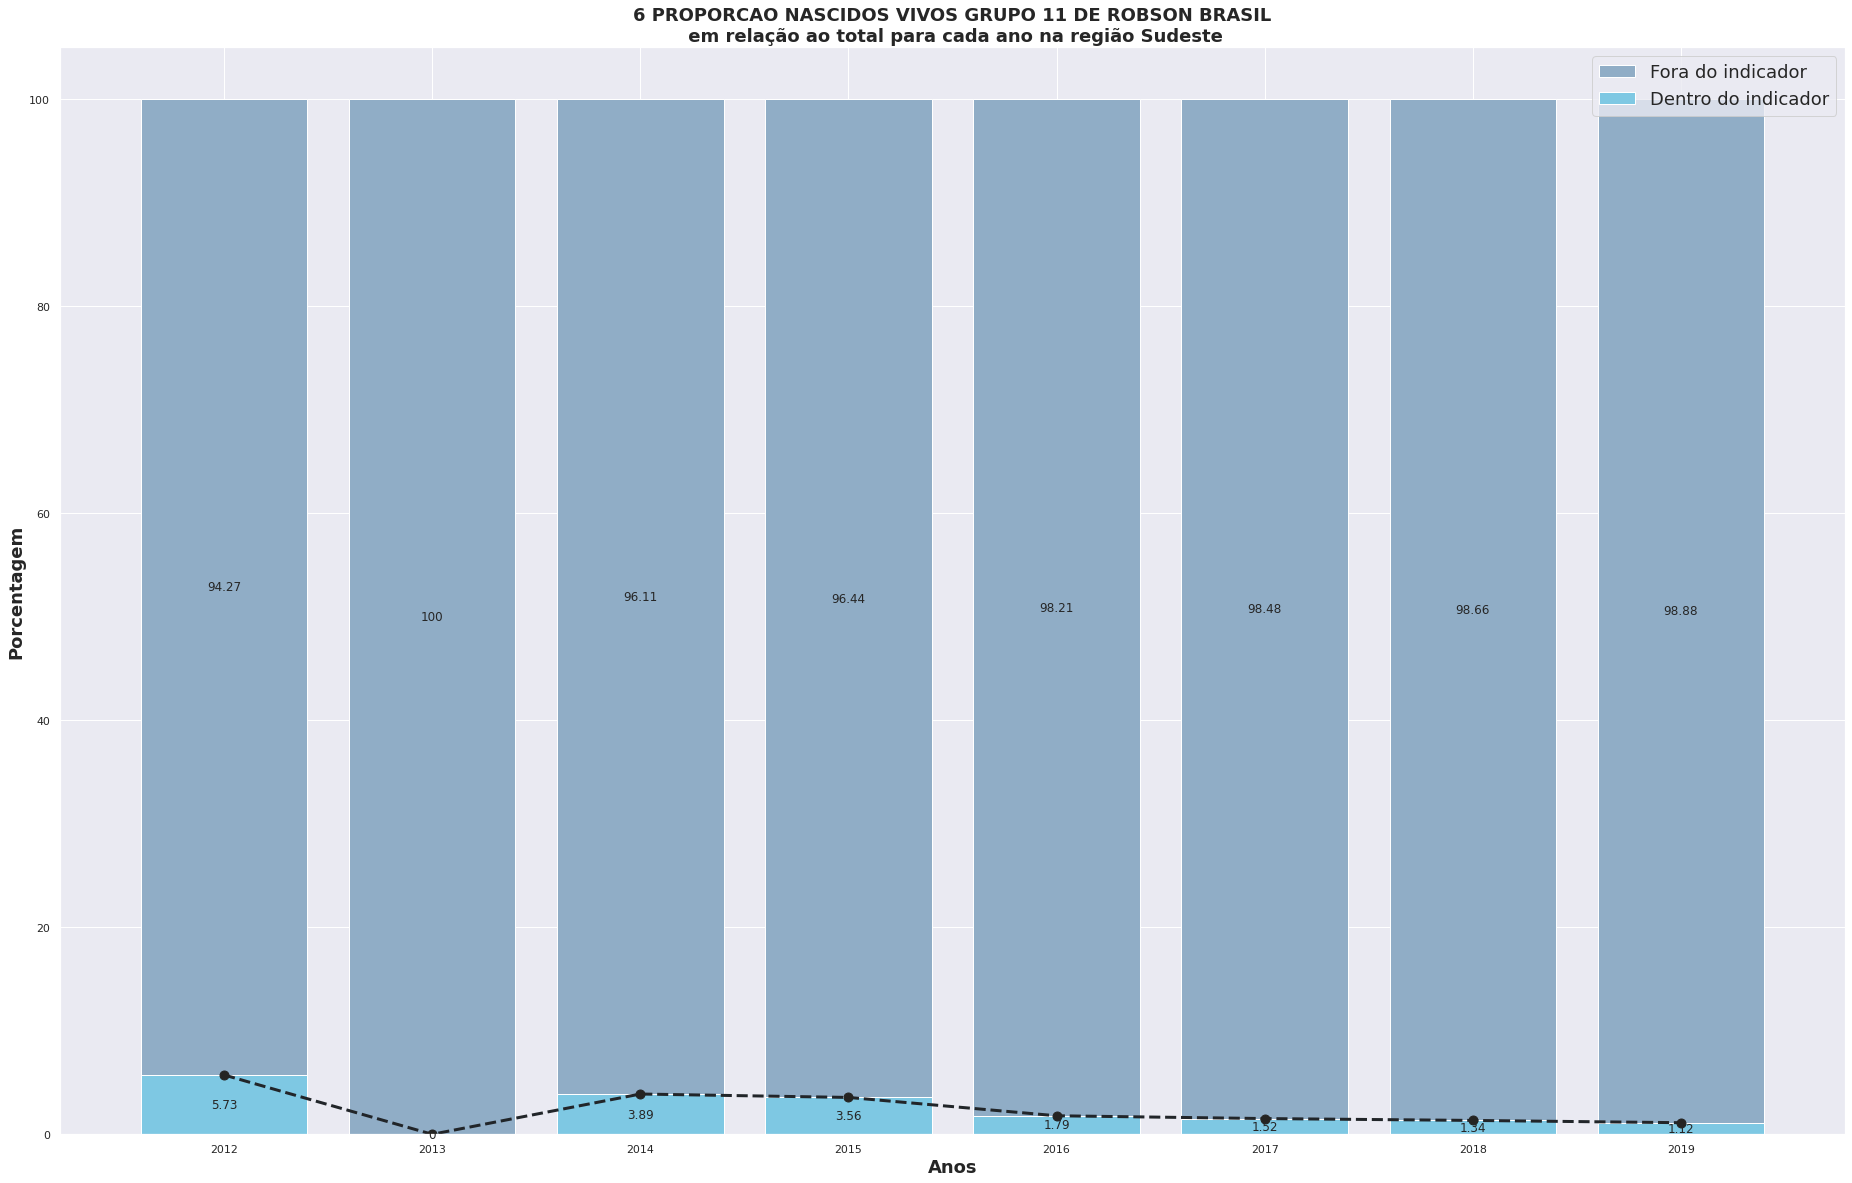

In [280]:
# Falta mostrar dentro desse gráfico a média Brasil em cada ano 

fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(regiao_acumulada[ano],  np.round(100 - 100*regiao_acumulada[ratio], decimals=2) , bottom= np.round(100*regiao_acumulada[ratio], decimals=2), color ='#90ADC6', label = 'Fora do indicador')
p2 = ax.bar(regiao_acumulada[ano],  np.round(100*regiao_acumulada[ratio], decimals=2), color ='#7EC8E3', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano na região " + nome_regiao, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico3', bbox_inches='tight')
plt.show()

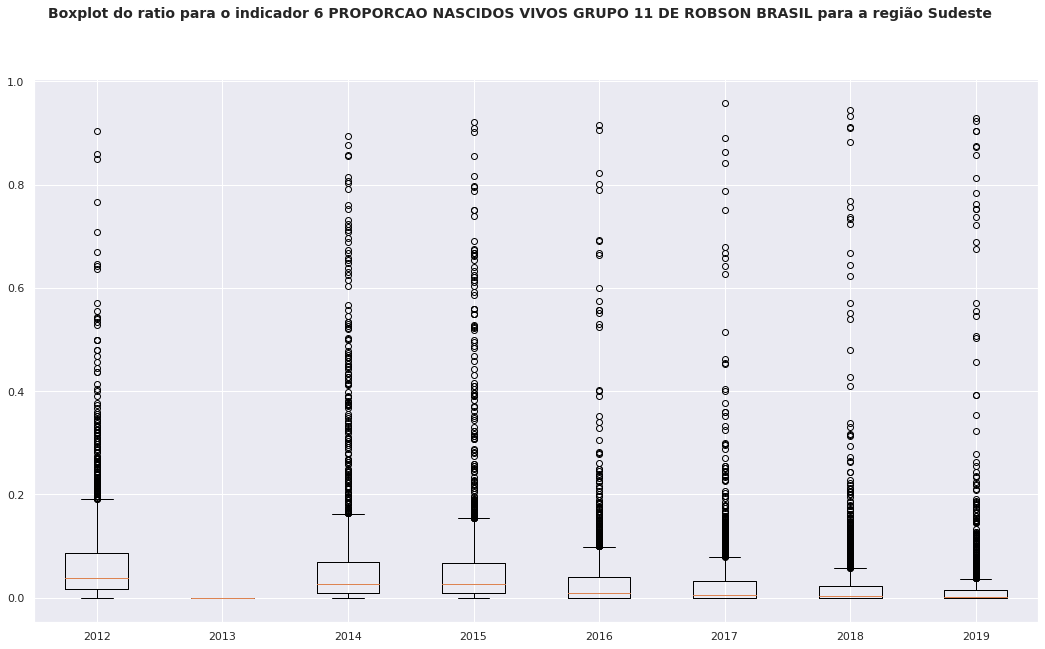

In [281]:
data_to_plot = [regiao[regiao[ano]==2012][ratio], regiao[regiao[ano]==2013][ratio],
                regiao[regiao[ano]==2014][ratio], regiao[regiao[ano]==2015][ratio],
                regiao[regiao[ano]==2016][ratio], regiao[regiao[ano]==2017][ratio],
                regiao[regiao[ano]==2018][ratio], regiao[regiao[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para a região ' + nome_regiao , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

## Gráficos por estado 

### Cálculo do acumulado para cada estado e país

In [282]:
# Dataframe dos municipios do estado escolhido
df_estado_municipios = subset_nao_ignorado.loc[ subset_nao_ignorado[coluna_codigo].str.extract('([0-9]{2})', expand=False) == str(cod_estado) ] 
print(df_estado_municipios)

      CODMUNRES  ano_nasc  Qtd_Robson  Qtd_Total     Ratio
25495    330010      2012          33       2698  0.012231
25496    330010      2013           0       2653  0.000000
25497    330010      2014          82       2838  0.028894
25498    330010      2015          60       2872  0.020891
25499    330010      2016          12       2628  0.004566
...         ...       ...         ...        ...       ...
26226    330630      2015         280       3439  0.081419
26227    330630      2016         256       3364  0.076100
26228    330630      2017         342       3272  0.104523
26229    330630      2018         328       3376  0.097156
26230    330630      2019         371       3096  0.119832

[736 rows x 5 columns]


In [283]:
df_brasil_acumulado = acumula(subset_nao_ignorado)
print(df_brasil_acumulado)

   ano_nasc  Qtd_Robson  Qtd_Total     Ratio
0      2012      236175    2905676  0.081281
1      2013           0    2903867  0.000000
2      2014      159727    2979133  0.053615
3      2015      150247    3017563  0.049791
4      2016      106555    2857704  0.037287
5      2017      103553    2923441  0.035422
6      2018       83202    2944826  0.028254
7      2019       74167    2849064  0.026032


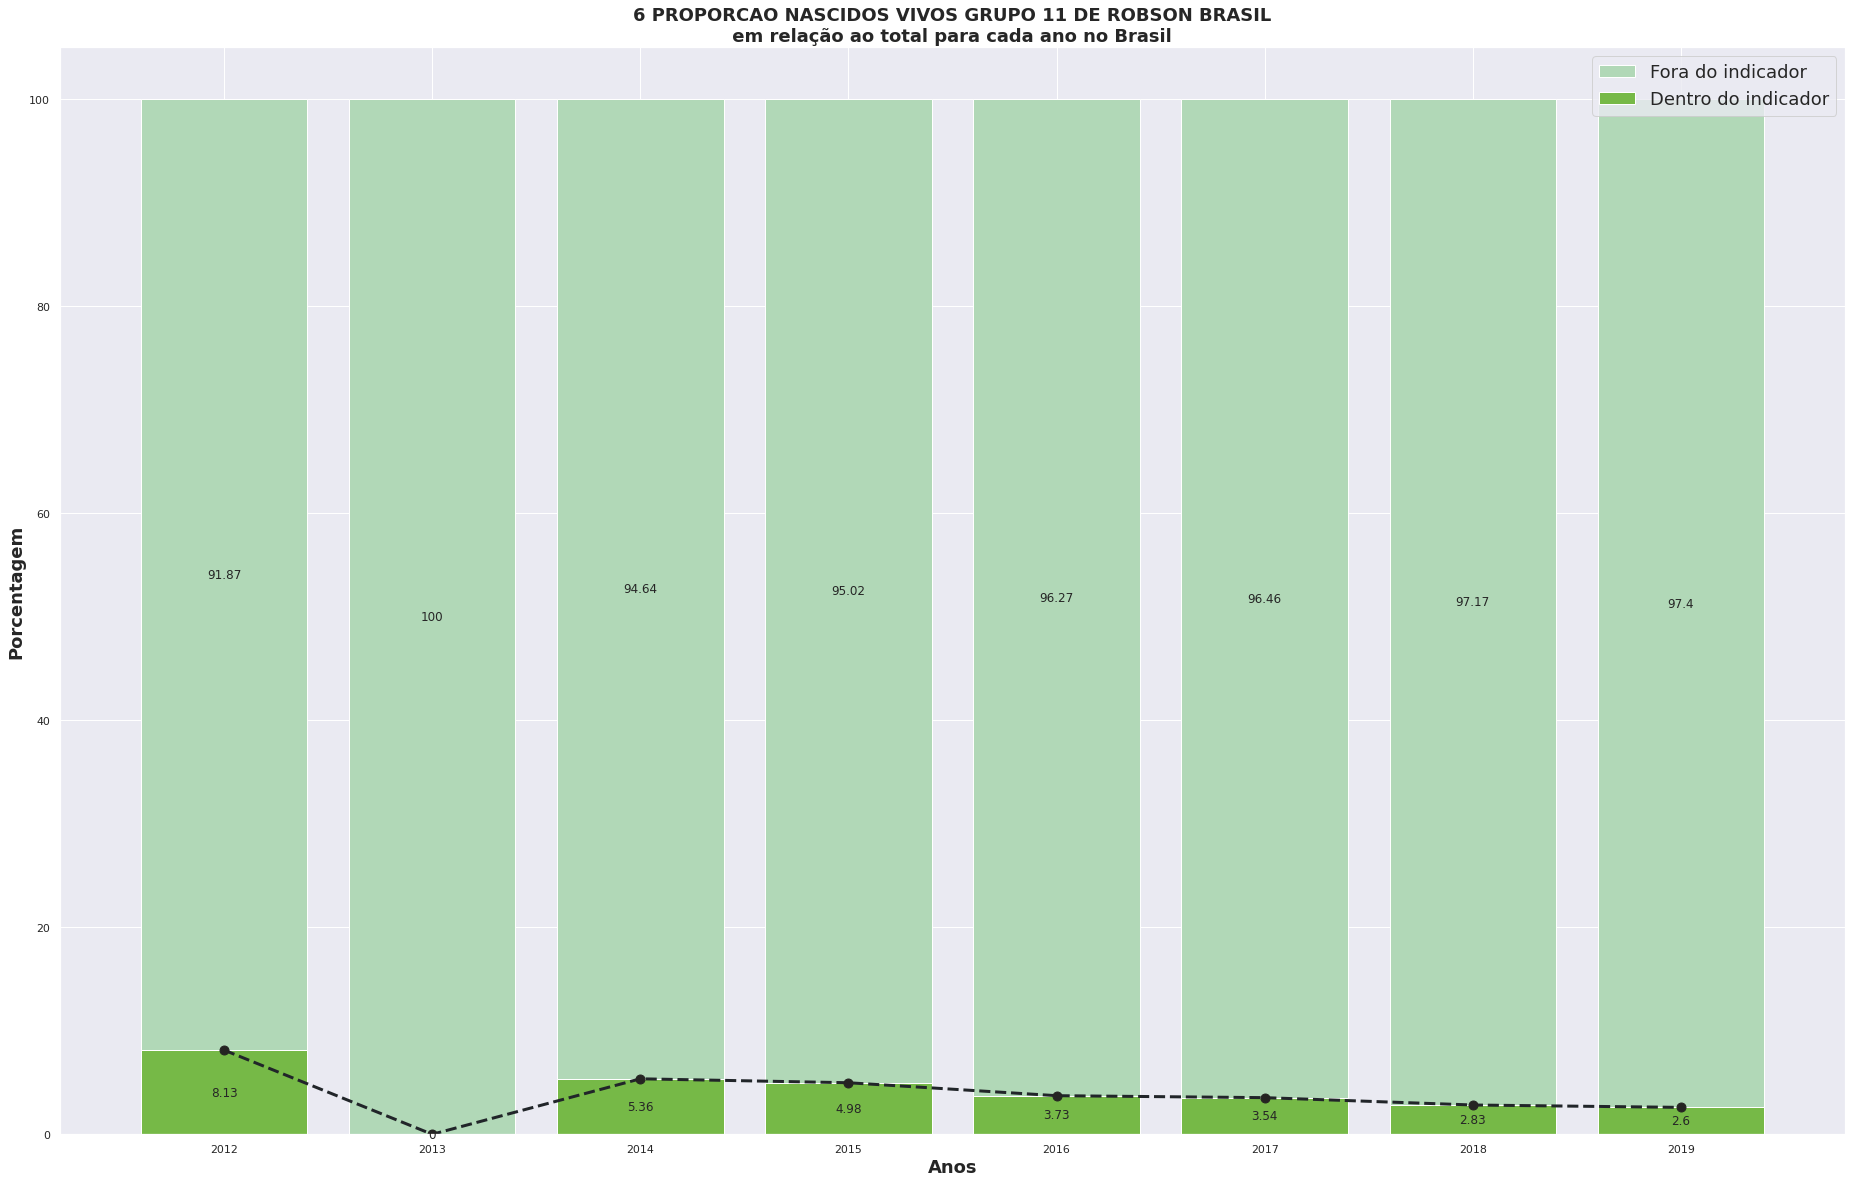

In [284]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529' )

p1 = ax.bar(df_brasil_acumulado[ano],  np.round(100 - 100*df_brasil_acumulado[ratio], decimals=2) , bottom= np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#B1D8B7', label = 'Fora do indicador')
p2 = ax.bar(df_brasil_acumulado[ano],  np.round(100*df_brasil_acumulado[ratio], decimals=2), color ='#76B947', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no Brasil ", **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )
plt.savefig('./Imagens/10-grafico4', bbox_inches='tight')
plt.show()

In [285]:
df_brasil_por_estado = df_grouped_by_state
print(df_brasil_por_estado)

     COD_UF  ano_nasc  Qtd_Robson  Qtd_Total     Ratio
0        11      2012        2506      26511  0.094527
1        11      2013           0      27081  0.000000
2        11      2014        4426      27556  0.160618
3        11      2015        3329      27914  0.119259
4        11      2016        3612      26600  0.135789
..      ...       ...         ...        ...       ...
211      53      2015        1891      46122  0.041000
212      53      2016        1093      43340  0.025219
213      53      2017        1967      44568  0.044135
214      53      2018         911      44195  0.020613
215      53      2019         571      42422  0.013460

[216 rows x 5 columns]


### Gráfico do município mostrando também as médias Brasil Estadual e Regional para cada ano

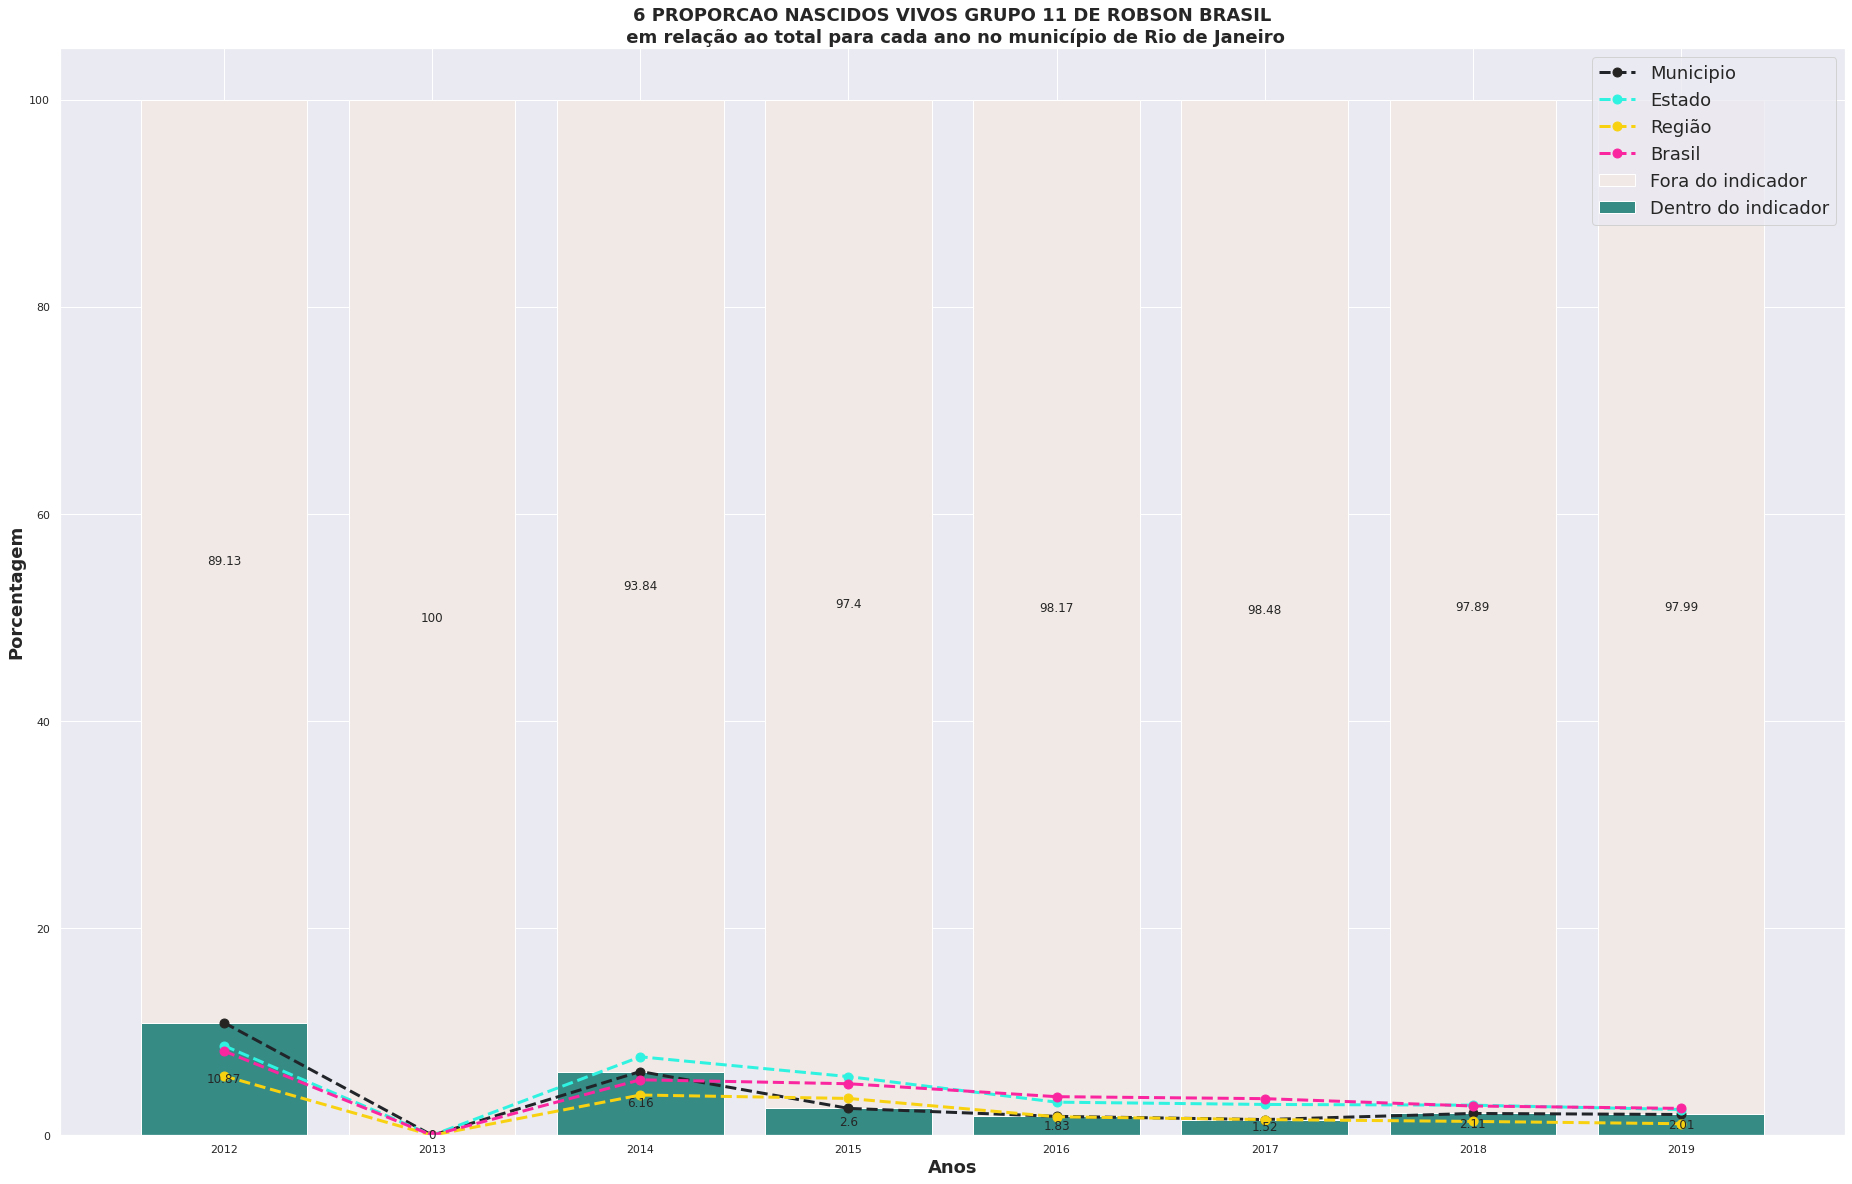

In [286]:
fig, ax = plt.subplots(figsize=(32, 20))

plt.plot(subset_mun[ano], np.round(100*subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(100*df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(100*regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(100*df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano],  np.round(100 - 100*subset_mun[ratio], decimals=2) , bottom= np.round(100*subset_mun[ratio], decimals=2), color ='#F1E9E5', label = 'Fora do indicador')
p2 = ax.bar(subset_mun[ano],  np.round(100*subset_mun[ratio], decimals=2), color ='#368B85', label = 'Dentro do indicador' )

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

plt.title(nome_indicador + "\n em relação ao total para cada ano no município de " + nome_municipio, **font)
plt.xlabel('Anos',**font)
plt.ylabel('Porcentagem',**font)

if(subset_mun[total].mean()<100):
    plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="center")
ax.bar_label(p2,label_type="center")
ax.legend(loc='upper right', fontsize = 18 )

plt.savefig('./Imagens/10-grafico5', bbox_inches='tight')
plt.show()

### Boxplot de todos os municípios de um estado em cada ano, lado a lado

Escolhemos um indicador, então um gráfico contendo os boxplot de cada ano é gerado para um estado em específico, nesse gráfico também está contida a informação de qual é a média mediana do estado. Além de indicar em qual quartil o estado se encontra em relação ao país (vale revisar se essa informação deveria estar aqui)

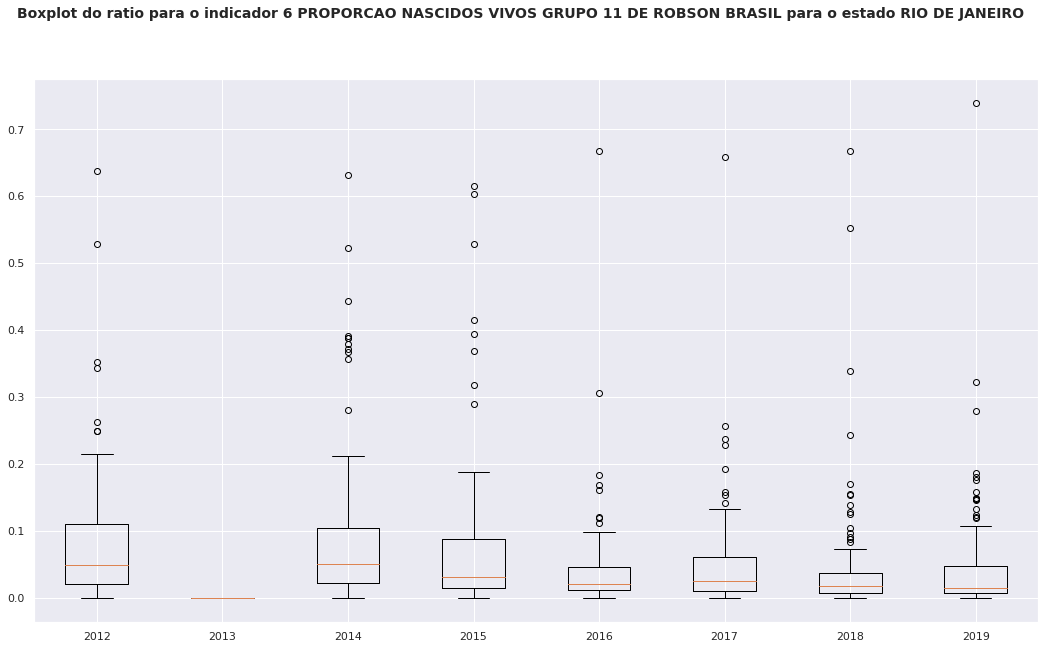

In [287]:
data_to_plot = [df_estado_municipios[df_estado_municipios[ano]==2012][ratio], df_estado_municipios[df_estado_municipios[ano]==2013][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2014][ratio], df_estado_municipios[df_estado_municipios[ano]==2015][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2016][ratio], df_estado_municipios[df_estado_municipios[ano]==2017][ratio],
                df_estado_municipios[df_estado_municipios[ano]==2018][ratio], df_estado_municipios[df_estado_municipios[ano]==2019][ratio]]

# Positions defaults to range(1, N+1) where N is the number of boxplot to be drawn.
# we will move them a little, to visually group them
fig = plt.figure(figsize=(18, 10))
fig.suptitle('Boxplot do ratio para o indicador ' + nome_indicador + ' para o estado ' + nome_estado , fontsize=14, fontweight='bold')

box = plt.boxplot(data_to_plot,
                  positions=[1, 2, 3, 4, 5, 6, 7, 8],
                  labels=['2012','2013','2014','2015','2016','2017','2018','2019'])

### Gráfico em barras do acumulado de cada estado em um ano, com cada estado lado a lado

In [288]:
subset_ano = subset_nao_ignorado[ subset_nao_ignorado[ano] == ano_esc ]
subset_ano.head()

,CODMUNRES,ano_nasc,Qtd_Robson,Qtd_Total,Ratio
11,110001,2016,8,326,0.024540
19,110002,2016,1340,1662,0.806258
27,110003,2016,0,73,0.000000
35,110004,2016,21,1338,0.015695
43,110005,2016,5,263,0.019011


In [289]:
df_brasil_por_estado
df_brasil_por_estado_e_ano = df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]
df_brasil_por_estado_e_ano.head(10)

,COD_UF,ano_nasc,Qtd_Robson,Qtd_Total,Ratio
4,11,2016,3612,26600,0.135789
12,12,2016,2746,15773,0.174095
20,13,2016,2844,76678,0.037090
28,14,2016,19,11375,0.001670
36,15,2016,15624,137679,0.113481
44,16,2016,883,15521,0.056891
52,17,2016,412,23869,0.017261
60,21,2016,5349,110489,0.048412
68,22,2016,1024,46986,0.021794
76,23,2016,11101,126245,0.087932


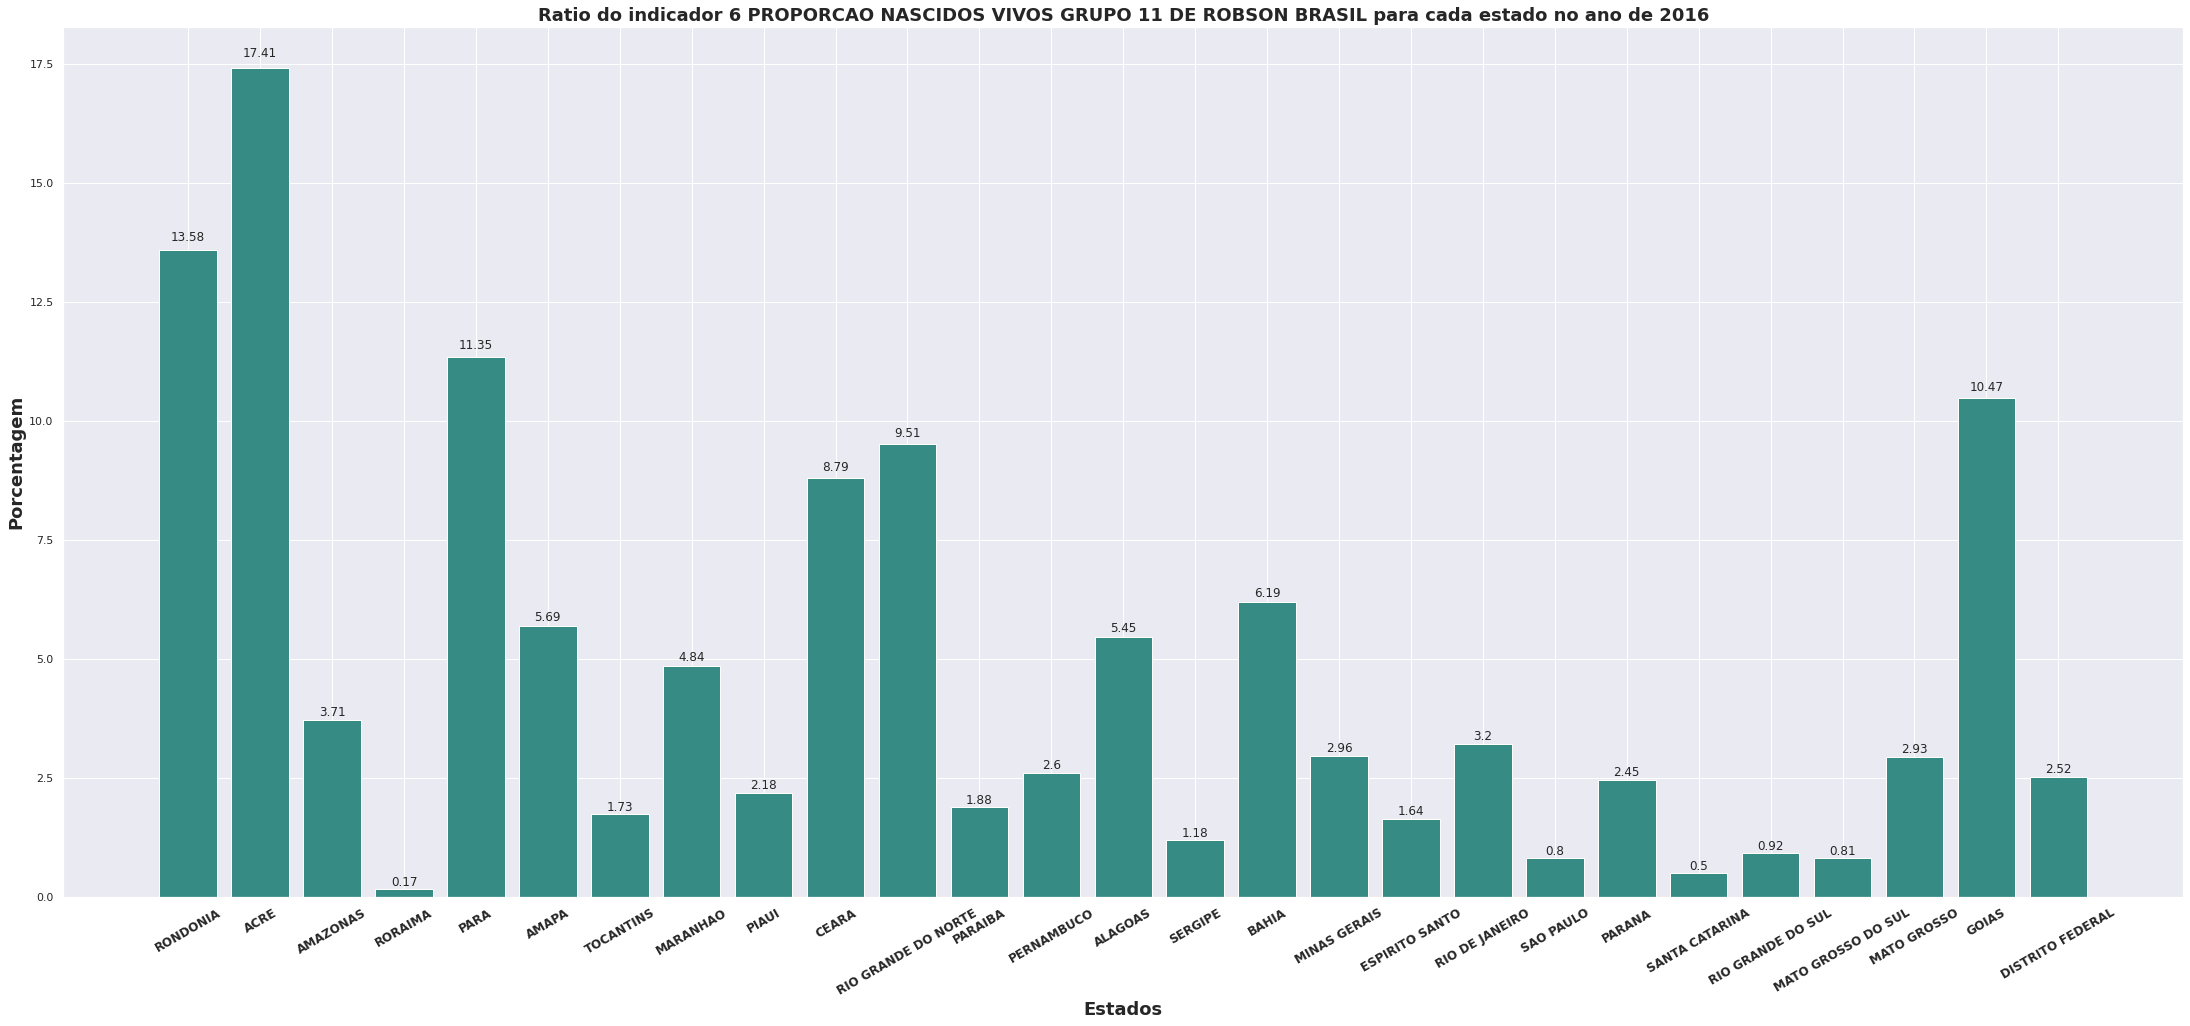

In [290]:
estados = df_estados['res_NOME_UF'].values

plt.figure(figsize=(38, 16))

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 12}


plt.title("Ratio do indicador " + nome_indicador +" para cada estado no ano de " + str(ano_esc),**font)
plt.xlabel('Estados',**font)
plt.ylabel('Porcentagem',**font)


#plt.bar(df_brasil_por_estado['COD_UF'],100*df_brasil_por_estado[df_brasil_por_estado[ano]==ano_esc]['ratio'], color ='#3458FF') #TODO
#plt.show()
estado_ = df_estados["res_NOME_UF"].values
merge1 = pd.merge(df_brasil_por_estado_e_ano, df_estados ,on=["COD_UF"])
#print(merge1.head(27))
y_pos = range(27)
grafico = plt.bar(merge1['res_NOME_UF'],100*merge1[ratio] , color ='#368B85')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, merge1['res_NOME_UF'], rotation=30,**font_label)

plt.savefig('./Imagens/10-grafico6', bbox_inches='tight')
plt.show()

### Gerar um gráfico semelhante ao acima, porém com as regiões lado a lado

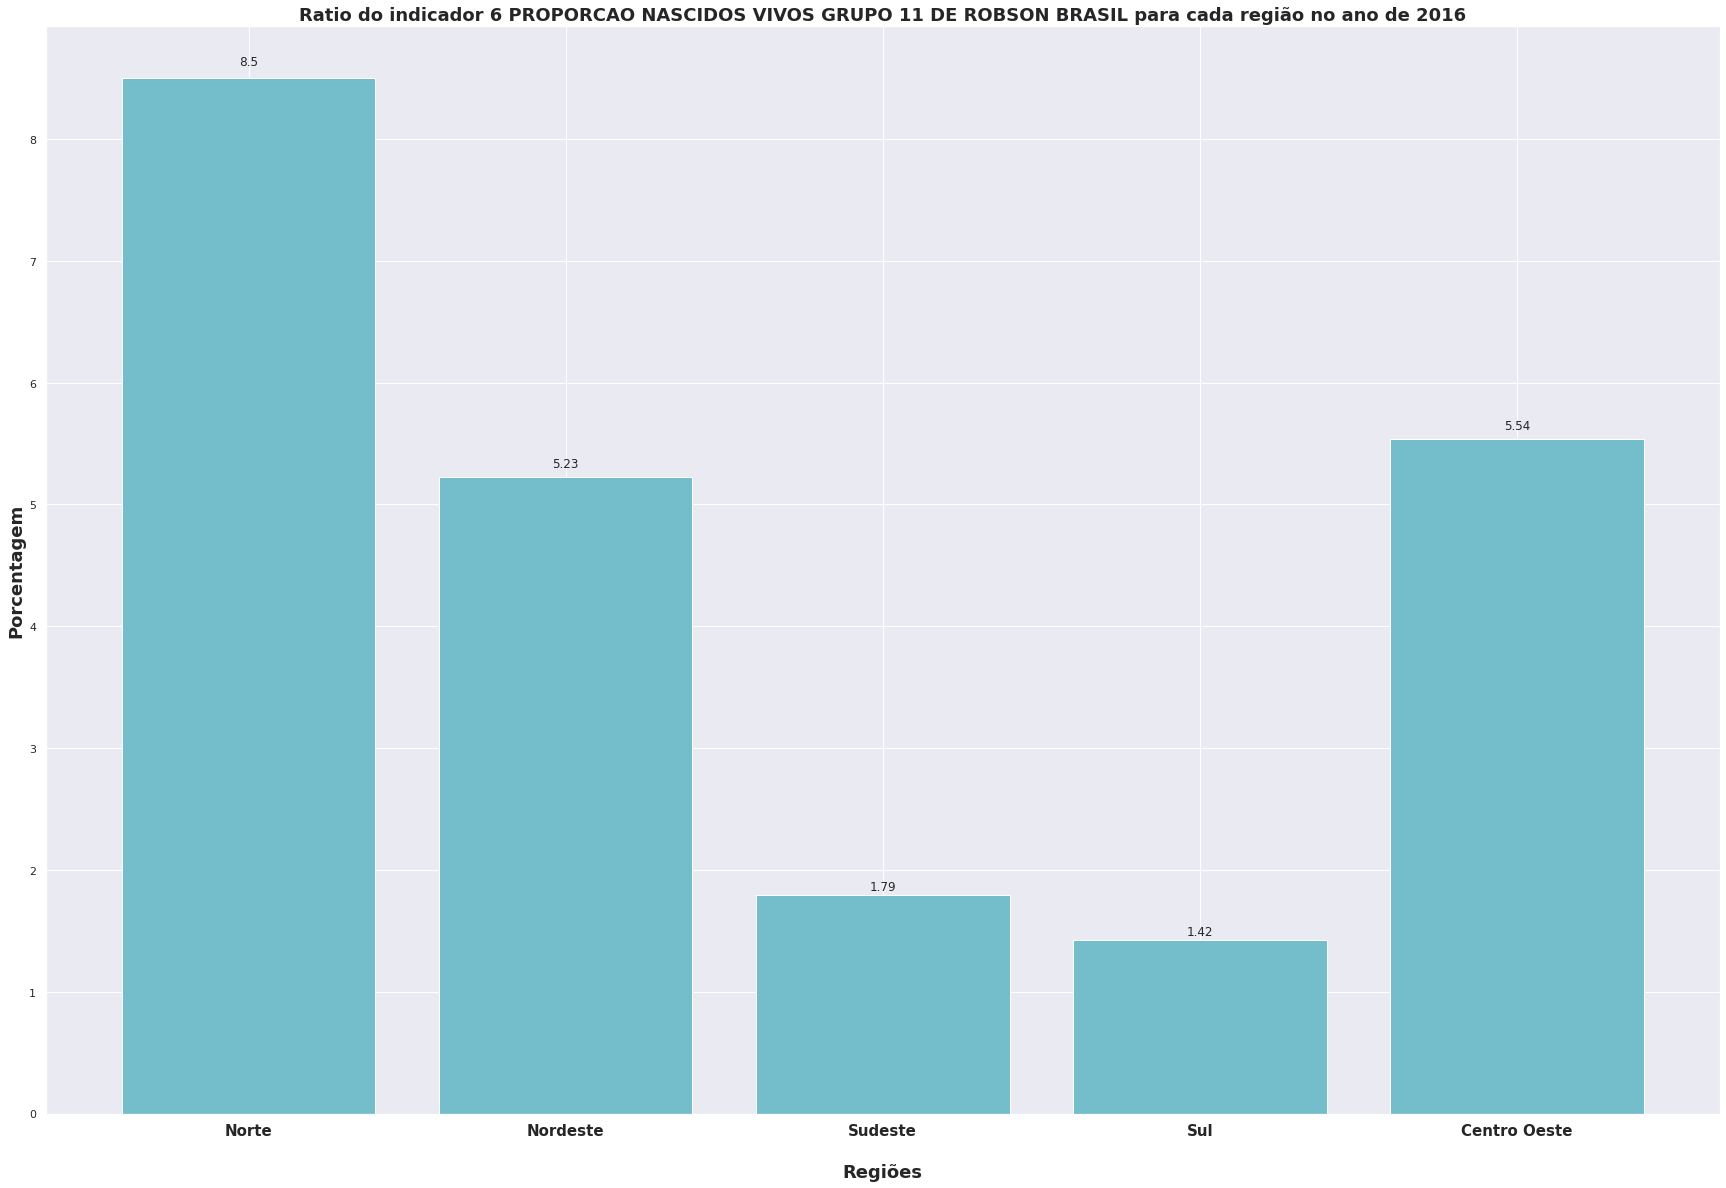

In [291]:
plt.figure(figsize=(30, 20))

aux = df_brasil_regiao[df_brasil_regiao[ano]==ano_esc]

font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 18}

font_label = {'family' : 'DejaVu Sans',
              'weight' : 'bold',
              'size'   : 15}


plt.title("Ratio do indicador " + nome_indicador +" para cada região no ano de " + str(ano_esc),**font)
plt.xlabel('\nRegiões',**font)
plt.ylabel('Porcentagem',**font)

y_pos = range(5)
grafico = plt.bar(aux['NOMEREGIAO'],100*aux[ratio] , color ='#74BDCB')
for i in grafico:
    height = i.get_height()
    plt.text(i.get_x() + i.get_width()/2., 1.01*height,  round(height, 2), ha='center', va='bottom')

plt.xticks(y_pos, aux['NOMEREGIAO'], rotation=0,**font_label)

plt.savefig('./Imagens/10-grafico7', bbox_inches='tight')
plt.show()

No handles with labels found to put in legend.


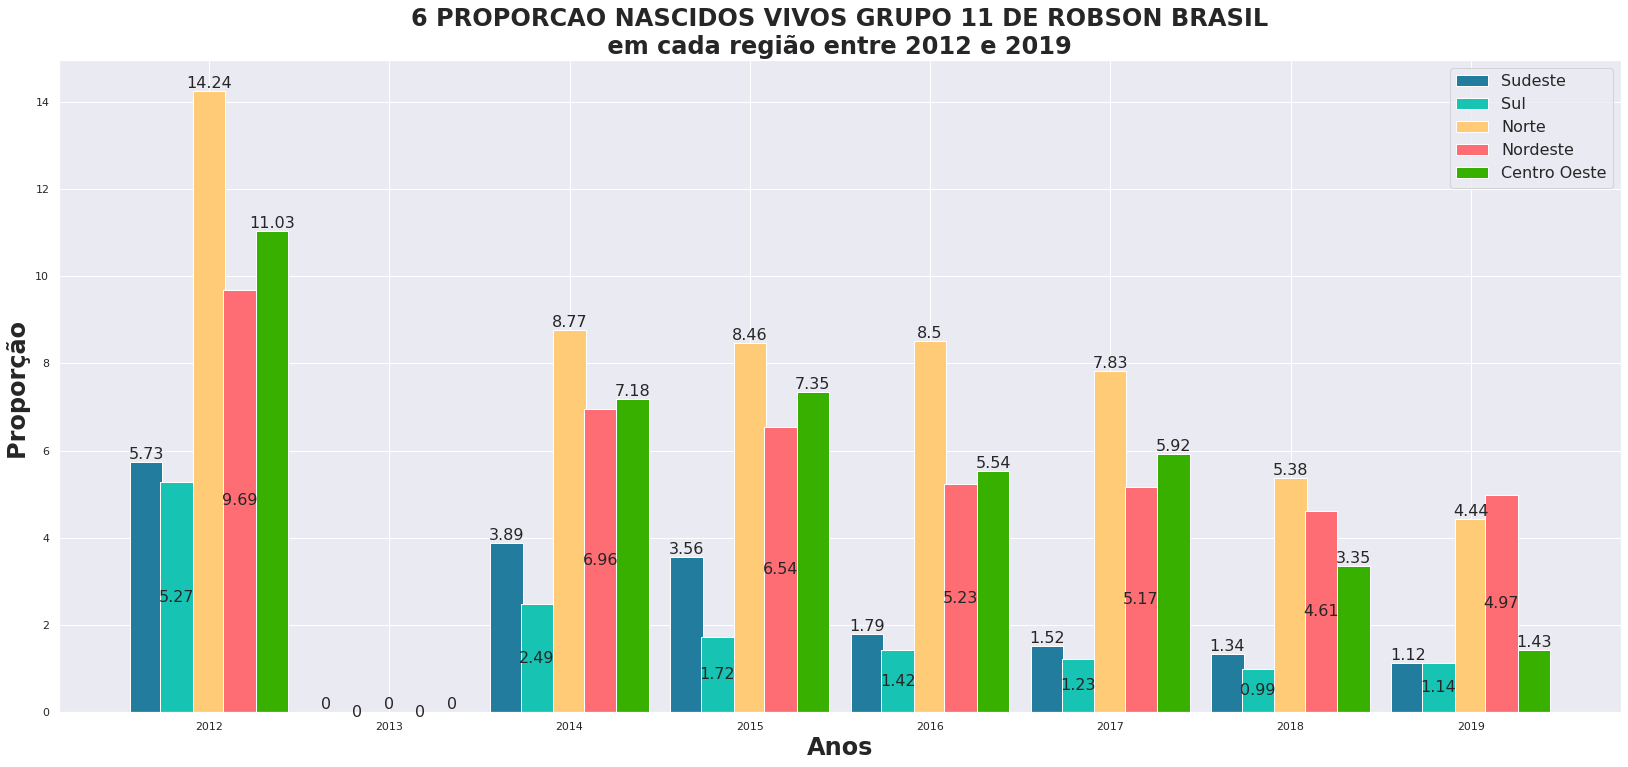

In [293]:
fig, ax = plt.subplots(figsize=(28, 12))

plt.rcParams.update({'font.size': 28})
'''
plt.plot(subset_mun[ano], np.round(subset_mun[ratio], decimals=2),'.--',markersize=18,mec='#252422',mfc='#252422',linewidth=3,color='#212529', label = 'Municipio' ) # Municipio
plt.plot(df_estado_acumulado[ano], np.round(df_estado_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#2FF3E0',mfc='#2FF3E0',linewidth=3,color='#2FF3E0' , label = 'Estado' ) # Estado
plt.plot(regiao_acumulada[ano], np.round(regiao_acumulada[ratio], decimals=2),'.--',markersize=18,mec='#F8D210',mfc='#F8D210',linewidth=3,color='#F8D210' , label = 'Região' ) # Região
plt.plot(df_brasil_acumulado[ano], np.round(df_brasil_acumulado[ratio], decimals=2),'.--',markersize=18,mec='#FA26A0',mfc='#FA26A0',linewidth=3,color='#FA26A0', label = 'Brasil'  ) # Brasil
'''

plt.legend(loc='upper left', fontsize = 18 )

p1 = ax.bar(subset_mun[ano]-0.35,  np.round(100*sudeste_acumulado[ratio], decimals=2), color ='#227c9d', label = 'Sudeste',width=0.18  )
p2 = ax.bar(subset_mun[ano]-0.18,  np.round(100*sul_acumulado[ratio], decimals=2), color ='#17c3b2', label = 'Sul',width=0.18  )
p3 = ax.bar(subset_mun[ano],       np.round(100*norte_acumulado[ratio], decimals=2), color ='#ffcb77', label = 'Norte',width=0.18  )
p4 = ax.bar(subset_mun[ano]+0.17,  np.round(100*nordeste_acumulado[ratio], decimals=2) , color ='#fe6d73', label = 'Nordeste',width=0.18 )
p5 = ax.bar(subset_mun[ano]+0.35,  np.round(100*centro_oeste_acumulado[ratio], decimals=2) , color ='#38b000', label = 'Centro Oeste',width=0.18 )
font = {'family' : 'DejaVu Sans',
        'weight' : 'bold',
        'size'   : 24}

font_n = {'family' : 'DejaVu Sans',
        #'weight' : 'bold',
        'size'   : 16}



plt.title(nome_indicador + "\n em cada região entre 2012 e 2019 " , **font)
plt.xlabel('Anos',**font)
plt.ylabel('Proporção ',**font)

#if(subset_mun[total].mean()<100):
 #   plt.text(0.03, 1.1, 'Esse município possui em média menos de 100 registros em cada ano', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)

ax.bar_label(p1,label_type="edge",**font_n)
ax.bar_label(p2,label_type="center",**font_n)
ax.bar_label(p3,label_type="edge",**font_n)
ax.bar_label(p4,label_type="center",**font_n)
ax.bar_label(p5,label_type="edge",**font_n)

ax.legend(loc='upper right', fontsize = 16 )

plt.savefig('./Imagens/10-grafico-robson-11', bbox_inches='tight')
plt.show()

# Refazer as médias

In [301]:
#Mediana e quartil 
df_para_data_selecionada = df_brasil_por_estado[df_brasil_por_estado[ano] ==  ano_esc]

Media_total = df_para_data_selecionada[total].mean()
Mediana_total = df_para_data_selecionada[total].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_total = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

Media_indicador = df_para_data_selecionada[indicador].mean()
Mediana_indicador = df_para_data_selecionada[indicador].median()

#0.25 1st quartile(lower), 0.5 2nd quartile or median(mid), 0.75 3rd quartile(upper)
Quartil_indicador = df_para_data_selecionada[indicador].quantile([0.25,0.5,0.75])

#print(df_brasil_por_estado)
print()
print("Media estadual do número total de registros feitos nesse ano (" ,ano_esc,"), no Brasil: ", float(Media_total))
print("Mediana do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil: ", float(Mediana_total))
print("Quartis do total de registros feitos nesse ano (" ,ano_esc,"), entre os estados do Brasil:\n",Quartil_total)
#------------------------------------------------
print()
print("Media estadual do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ", float(Media_indicador))
print("Mediana do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil: ", float(Mediana_indicador))
print("Quartis do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") entre os estados do Brasil:\n",Quartil_indicador)
print()
print('Dataframe agrupado por estado no ano de ',ano_esc,'\n')
print(df_para_data_selecionada)


Media estadual do número total de registros feitos nesse ano ( 2016 ), no Brasil:  2482.5925925925926
Mediana do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:  1245.0
Quartis do total de registros feitos nesse ano ( 2016 ), entre os estados do Brasil:
 0.25     459.5
0.50     709.0
0.75    1773.0
Name: Qtd_Obitos_Investigados, dtype: float64

Media estadual do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) no Brasil:  1477.5185185185185
Mediana do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) entre os estados do Brasil:  709.0
Quartis do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) entre os estados do Brasil:
 0.25     459.5
0.50     709.0
0.75    1773.0
Name: Qtd_Obitos_Investigados, dtype: float64

Dataframe agrupado por estado no ano de  2016 

     COD_UF   Ano  Qtd_Obitos_Investigados  Qtd_Total    

In [302]:
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no Brasil: ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_pais # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no Brasil: ",  float(media_indicador_mun_pais))

NameError: name 'numero_municipios_pais' is not defined

In [303]:
#média de município do estado: numero total de registros em um ano no estado / numero total de municípios que foram contabilizados no estado
#média de município do país inteiro: numero total de registros em um ano no brasil / numero total de municípios que foram contabilizados no pais
df_aux=df_estado_acumulado[df_estado_acumulado[ano]==ano_esc]
media_total_mun_pais=df_aux[total]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de total de registros feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ", float(media_total_mun_pais))

df_aux=df_brasil_acumulado[df_brasil_acumulado[ano]==ano_esc]
media_indicador_mun_pais=df_aux[indicador]/numero_municipios_estado # tem que revisar isso, pq o numero de municipios considerados é diferente para cada ano
print("Media municipal do número de registros dentro do indicador", nome_indicador," feito nesse ano (", ano_esc, ") no estado", nome_estado, ": ",  float(media_indicador_mun_pais))


Media municipal do número de total de registros feito nesse ano ( 2016 ) no estado RIO DE JANEIRO :  72.8695652173913
Media municipal do número de registros dentro do indicador PROP OBITOS INVESTIGADOS BRASIL  feito nesse ano ( 2016 ) no estado RIO DE JANEIRO :  433.6195652173913


In [304]:
# Médias regionais

## Describe por Estado

Dados do país inteiro considerando as proporções de cada estado (em todos os anos)

In [262]:
df_aux = df_brasil_por_estado[['COD_UF', 'Ratio']]
df_to_describe = df_aux.groupby(['COD_UF']).mean()
#df_to_describe.sort_values('Ratio',ascending=False)
aux = df_to_describe.describe()
df_to_describe['Ratio'].quantile([0.25,0.5,0.75])
aux

,Ratio
count,27.000000
mean,1.038126
std,0.508131
min,0.458553
25%,0.663029
50%,0.962927
75%,1.223806
max,2.651692


In [1861]:
df_to_describe

,Ratio
COD_UF,
11,0.697050
12,0.785376
13,0.847444
14,0.703706
15,0.891087
16,0.838350
17,0.829189
21,0.837696
22,0.818170


## Describe por Município

Dados do país inteiro considerando as proporções de cada município (em todos os anos)

In [1862]:
df_aux = subset_nao_ignorado[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
df_to_describe.describe()

,Ratio
count,5570.000000
mean,0.560016
std,0.299962
min,0.000000
25%,0.273966
50%,0.622585
75%,0.840240
max,0.989620


## Describe No Estado

Dados do estado escolhido (Rio de Janeiro) considerando as proporções de cada município (em todos os anos)


In [1863]:
df_aux = df_estado_municipios[['CODMUNRES', 'Ratio']]
df_to_describe = df_aux.groupby(['CODMUNRES']).mean()
descricao = df_to_describe.describe()
print(descricao)
print(descricao.at['25%','Ratio'])

#len_25 = len(df_estado_municipios[df_estado_municipios[ratio]<= ])

           Ratio
count  92.000000
mean    0.568746
std     0.122096
min     0.301044
25%     0.490306
50%     0.569489
75%     0.638572
max     0.838296
0.4903064131515108


## Gráfico de Pizza para visualizar a proporção de municípios e estados em cada quartil (vamos ver os quartis do país e do estado) além de indicar em qual quartil o município e estado escolhido se encontram

In [1864]:
# '330455'
df_to_describe

,Ratio
CODMUNRES,
330010,0.521980
330015,0.362003
330020,0.660029
330022,0.555678
330023,0.583531
330025,0.540441
330030,0.613840
330040,0.528183
330045,0.794408


In [1865]:
df_estado_municipios

,CODMUNRES,ano_nasc,Qtd_2ou4Racacor,Qtd_Total,Ratio
25495,330010,2012,1246,2698,0.461824
25496,330010,2013,1054,2653,0.397286
25497,330010,2014,1374,2838,0.484144
25498,330010,2015,1514,2872,0.527159
25499,330010,2016,1422,2628,0.541096
...,...,...,...,...,...
26226,330630,2015,1503,3439,0.437046
26227,330630,2016,1392,3364,0.413793
26228,330630,2017,1454,3272,0.444377
26229,330630,2018,1458,3376,0.431872


In [1866]:
len_25 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_50 = len(df_to_describe[df_to_describe[ratio]<= descricao.at['25%','Ratio']])
len_75 = len(df_to_describe[df_to_describe[ratio]>= descricao.at['75%','Ratio']])

len_75

23